# The discretization of gradient descend flow

## Import library and setup dependency

#### Universal library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [20]:
import os
import sys

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ''))
sys.path.append(project_root)

print(f"current: {os.getcwd()}")
print(f"root   : {project_root}")

current: c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison
root   : c:\Users\BTCOM\Desktop\0_Project\DeepLearning\hessian-optimizer-comparison


In [21]:
from custom_library.utils import dataUtils
import custom_library.models as my_models

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialize Model

---
### Explicit Gradient Descend (Normal Gradeint Descend)
- The linear approximation 


- Taylor: $L(\theta) = L(\theta_0) + \nabla L(\theta_0)(\Delta \theta)$


Final: $\theta_{k+1} = \theta_k - \eta \nabla L(\theta_k)$

In [7]:
ExplicitModel = my_models.ExplicitLrModel

---
### Implicit Gradient Descend (Backward euler on quadratic):
- The quadratic approximation


- Taylor: $L(\theta) = L(\theta_0) + \nabla L(\theta_0)(\Delta \theta) + \frac{1}{2} (\Delta \theta)^T \nabla^2 L(\theta_0)(\Delta \theta)$


- $\theta_{k+1} = \theta_k - \eta \nabla L(\theta_{k+1})$


Final: $\theta_{k+1} = (I + \eta H)^-1 (\theta_k + \eta b)$

In [8]:
ImplicitModel = my_models.ImplicitLrModel

---
### Newton Gradient Descend (Newton's method):
- The quadratic approximation, jump to optimum (vertex)


- Taylor: $L(\theta) = L(\theta_0) + \nabla L(\theta_0)(\Delta \theta) + \frac{1}{2} (\Delta \theta)^T \nabla^2 L(\theta_0)(\Delta \theta)$


- $\nabla L (\theta) = \Delta L (\theta_0) + H(\Delta \theta)$


- $0 = \Delta L (\theta_0) + H(\Delta \theta)$


Final: $\theta_{k+1} = \theta_{k} - H^-1 \Delta L (\theta_k)$

In [9]:
# Using optimize because default newton is too sensitive to data that has not been cleaned
NewtonModel = my_models.OptimizeNewtonLrModel

## Systhesis DataSets

In [22]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear+0.2,5)*0.5 + np.pow(linear-0.1, 1)*0.3 + np.pow(linear,3)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

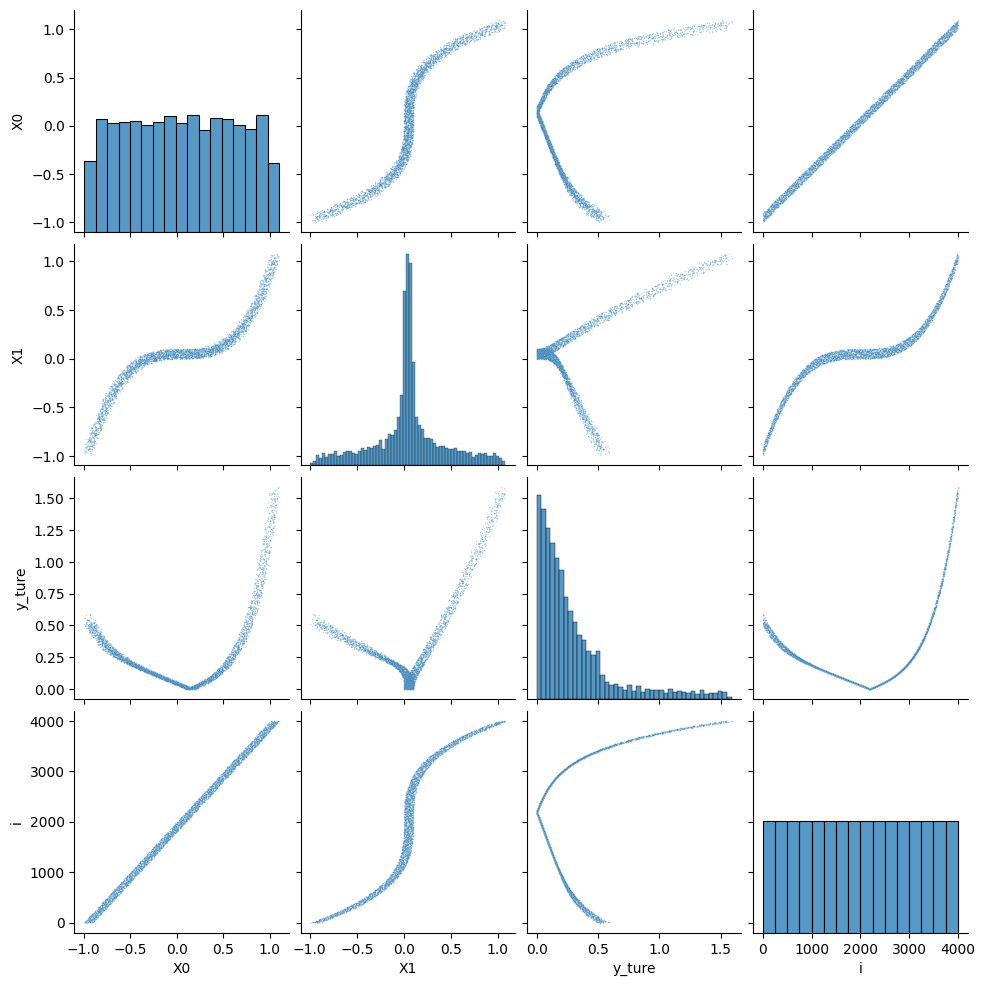

In [23]:
# make the pairplot
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

## Initialize Dense and Activity layers

### Initial new weight

In [30]:
baseModel = my_models.ImplicitLrModel()
baseModel.add(50, input_shape=2)
baseModel.add(30, activation="relu")
baseModel.add(10, activation="relu")
baseModel.add(10, activation="relu")
baseModel.add(5)
baseModel.add(1) 

### Rollback weight to origin point

In [31]:
explicitModel = ExplicitModel()
implicitModel = ImplicitModel()
newtonModel = NewtonModel()

In [32]:
models = [explicitModel, implicitModel, newtonModel]

In [33]:
newtonModel = NewtonModel()

In [34]:
## Make all models start at the same position
baseLayers = baseModel.layers

# baseLayers = saveModel.layers

for model in models:
    model.copylayers(baseLayers)

In [35]:
newtonModel.copylayers(baseLayers)

## Train Models

### Control

In [36]:
epochs = 10
batch_size = 64

### Train Explicit GD

In [37]:
explicitModel_history = explicitModel.fit(X_train, y_train, X_eval, y_eval, epochs=epochs, batch_size=batch_size, learning_rate=0.01)

Epoch 1/10 [=........................], 0/3200: 
batch: 0.675, acc: 0.740, val: 0.743
Epoch 1/10 [=........................], 64/3200: 
batch: 0.416, acc: 0.407, val: 0.396
Epoch 1/10 [=........................], 128/3200: 
batch: 0.212, acc: 0.259, val: 0.268
Epoch 1/10 [=........................], 192/3200: 
batch: 0.188, acc: 0.192, val: 0.193
Epoch 1/10 [=........................], 256/3200: 
batch: 0.131, acc: 0.155, val: 0.150
Epoch 1/10 [=........................], 320/3200: 
batch: 0.128, acc: 0.138, val: 0.141
Epoch 1/10 [=........................], 384/3200: 
batch: 0.118, acc: 0.119, val: 0.114
Epoch 1/10 [=........................], 448/3200: 
batch: 0.095, acc: 0.111, val: 0.112
Epoch 1/10 [=........................], 512/3200: 
batch: 0.109, acc: 0.104, val: 0.104
Epoch 1/10 [=........................], 576/3200: 
batch: 0.093, acc: 0.103, val: 0.101
Epoch 1/10 [=........................], 640/3200: 
batch: 0.115, acc: 0.098, val: 0.098
Epoch 1/10 [=......................

### Train Implicit GD

In [38]:
implicitModel_history = implicitModel.fit(X_train, y_train, X_eval, y_eval, epochs=epochs, batch_size=batch_size, learning_rate=0.05)

Epoch 1/10 [=........................], 0/3200: 
batch: 167998.081, acc: 193170.007, val: 195901.420


KeyboardInterrupt: 

### Train Newton GD

In [ ]:
newtonModel_history = newtonModel.fit(X_train, y_train, X_eval, y_eval, epochs=epochs, batch_size=batch_size, damping_factor=1e-4)

Epoch 1/10 [=........................], 0/3200: 
batch: 0.142, acc: 0.159, val: 0.151
Epoch 1/10 [=........................], 64/3200: 
batch: 0.119, acc: 0.150, val: 0.142
Epoch 1/10 [=........................], 128/3200: 
batch: 0.112, acc: 0.118, val: 0.114
Epoch 1/10 [=........................], 192/3200: 
batch: 0.105, acc: 0.108, val: 0.104
Epoch 1/10 [=........................], 256/3200: 
batch: 0.136, acc: 0.113, val: 0.113
Epoch 1/10 [=........................], 320/3200: 
batch: 0.107, acc: 0.096, val: 0.097
Epoch 1/10 [=........................], 384/3200: 
batch: 0.094, acc: 0.096, val: 0.098
Epoch 1/10 [=........................], 448/3200: 
batch: 0.075, acc: 0.078, val: 0.080
Epoch 1/10 [=........................], 512/3200: 
batch: 0.091, acc: 0.078, val: 0.080
Epoch 1/10 [=........................], 576/3200: 
batch: 0.067, acc: 0.074, val: 0.076
Epoch 1/10 [=........................], 640/3200: 
batch: 0.068, acc: 0.065, val: 0.065
Epoch 1/10 [=......................

## Evaluate Models

In [45]:
history = [explicitModel.getHistory(), implicitModel.getHistory(), newtonModel.getHistory()]

### loss/batch

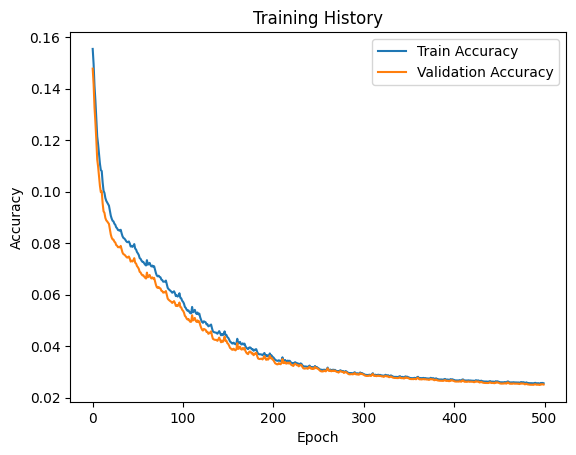

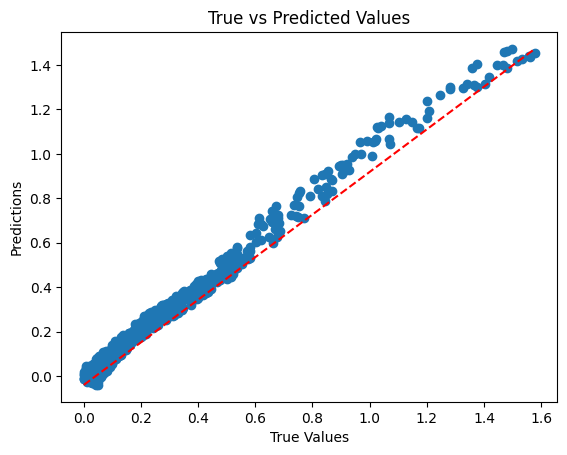

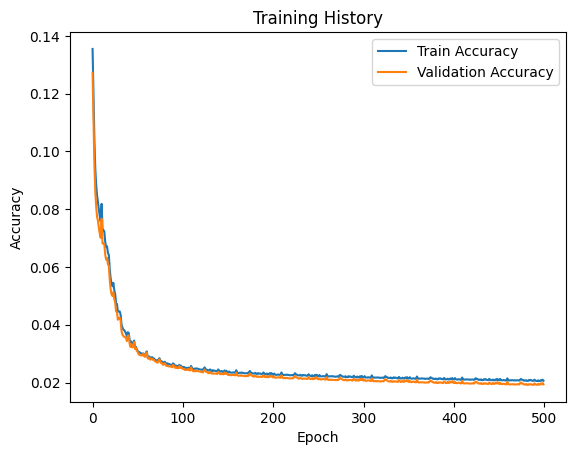

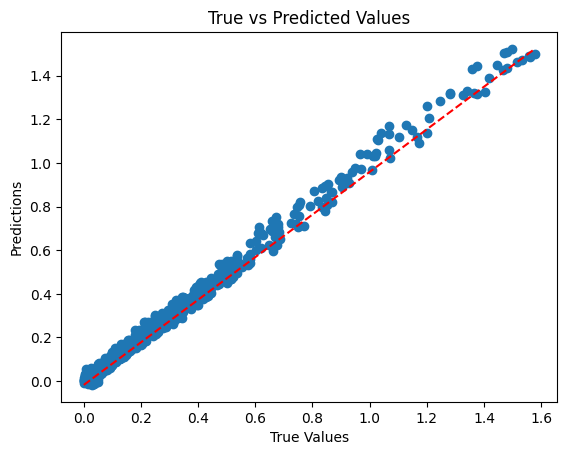

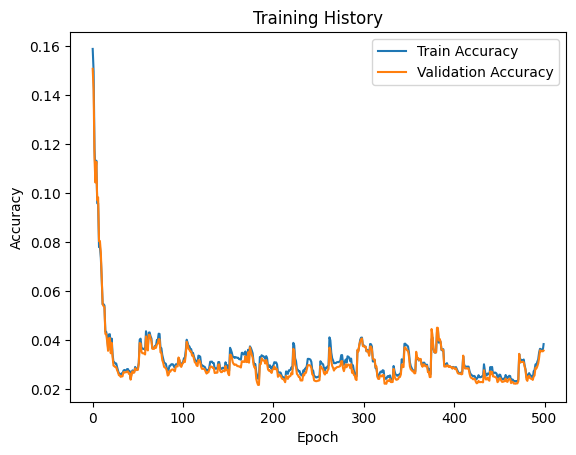

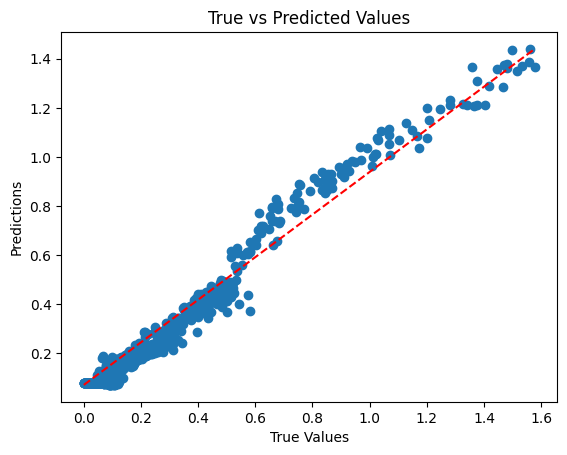

In [46]:
for h in history:
    h.evaluate()

## Compare Rate

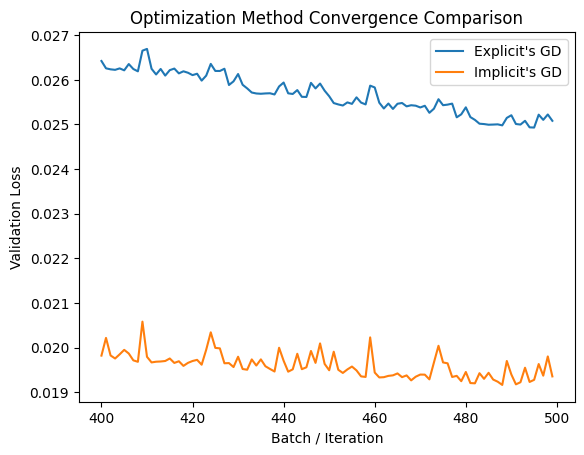

In [70]:
label = ["Explicit's GD", "Implicit's GD", "Newton's GD"]

start = 400
end = len(hist_arr)

for i, h in enumerate(history):
    if i == 2:
        break
    hist_arr = np.array(h.history)

    x = [i for i in range(start, end, 1)]
    train_acc = hist_arr[start:end, 0]
    val_acc = hist_arr[start:end, 1]

    plt.plot(x, val_acc, label=f'{label[i]}')
    plt.xlabel('Batch / Iteration')
    plt.ylabel('Validation Loss') # Or Training Loss, depending on what hist_arr[:, 1] represents
    plt.title('Optimization Method Convergence Comparison') 
    plt.legend()
plt.show()

### Predict trend

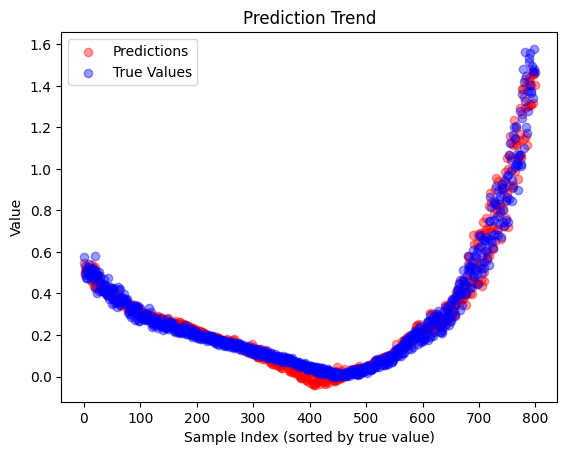

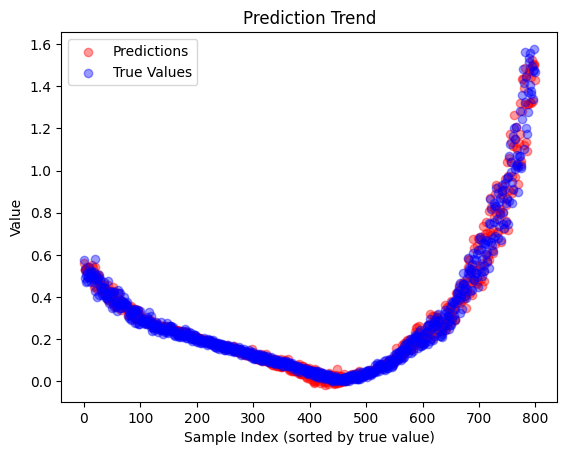

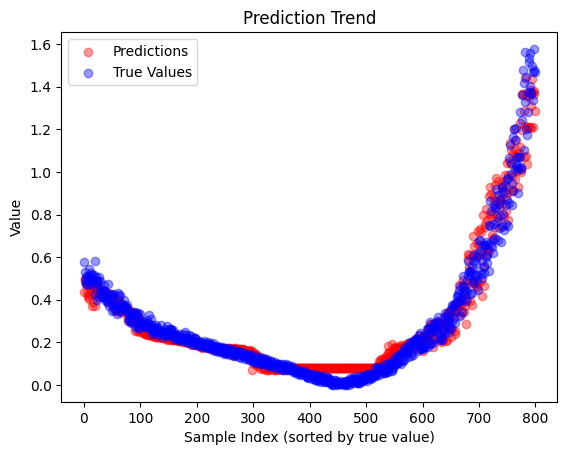

In [50]:
for h in history:
    h.display_trend()

## Implicit GD with Adam (Coming soon)

# Other (Ideas Playground)

In [39]:
import pickle
import datetime

now = datetime.datetime.now()
time_stamp = now.strftime("%d%m%Y_%H%M%S")

name = ['explicit', 'implicit', 'newton']
file_name = 'modele.pkl'

for i,model in enumerate(models):
    # Open the file in binary write mode ('wb')
    with open(f'model_saves/{time_stamp}_{name[i]}_{file_name}', 'wb') as file:
        # Use pickle.dump(object, file_handle)
        pickle.dump(model, file)

datas = [X_train, y_train, X_eval, y_eval]
name = ['X_train', 'y_train', 'X_eval', 'y_eval']
file_name = 'dataset.pkl'

for i,data in enumerate(datas):
    # Open the file in binary write mode ('wb')
    with open(f'model_saves/{time_stamp}_{name[i]}_{file_name}', 'wb') as file:
        # Use pickle.dump(object, file_handle)
        pickle.dump(data, file)

print(f"Class instance saved to {file_name}")

Class instance saved to dataset.pkl


In [40]:
import copy

saveModel = copy.deepcopy(baseModel)
saveModel

### Explicit GD

#### Setup LR models class

In [ ]:
model = my_models.ExplicitLrModel()

In [ ]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [ ]:
model.total_params()

2161

#### Load dataset

In [57]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear+0.6,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,3)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


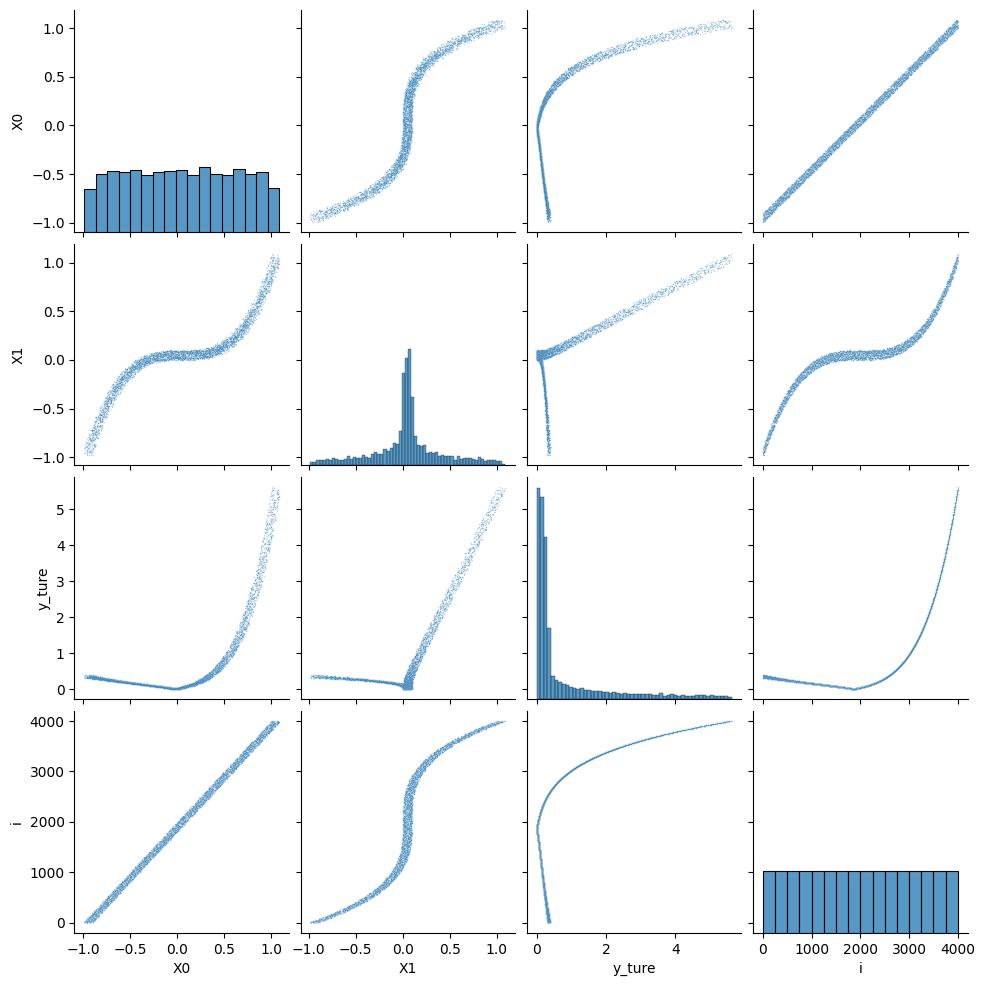

In [58]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [ ]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=5, batch_size=256, learning_rate=0.001)

Epoch 1/5 [=........................], 0/3200: 
batch: 9.329, acc: 9.985, val: 9.305
Epoch 1/5 [=........................], 256/3200: 
batch: 4.977, acc: 4.746, val: 4.425
Epoch 1/5 [=........................], 512/3200: 
batch: 2.357, acc: 2.819, val: 2.599
Epoch 1/5 [=........................], 768/3200: 
batch: 2.032, acc: 2.167, val: 2.097
Epoch 1/5 [=........................], 1024/3200: 
batch: 1.277, acc: 1.267, val: 1.230
Epoch 1/5 [=........................], 1280/3200: 
batch: 16.739, acc: 16.026, val: 14.814
Epoch 1/5 [=........................], 1536/3200: 
batch: 8.150, acc: 7.721, val: 7.164


KeyboardInterrupt: 

#### Evaluate Model

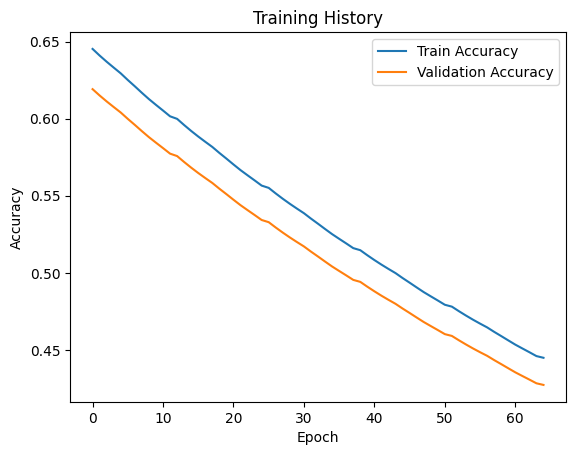

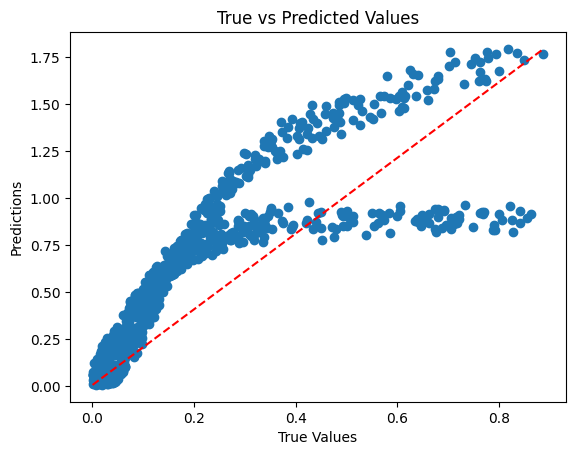

In [ ]:
history.evaluate()

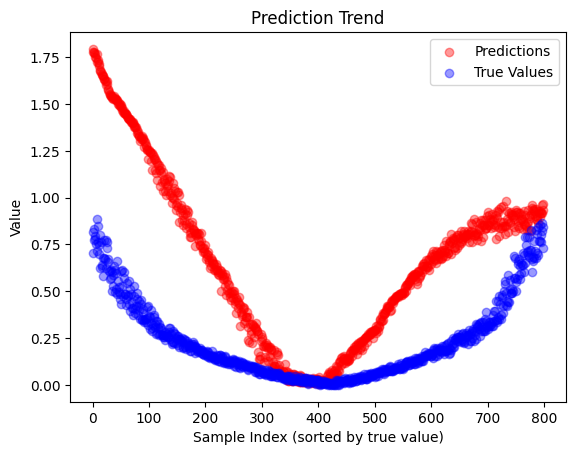

In [ ]:
history.display_trend(ref="x", axis=0)

### Implicit GD

#### Setup LR models class

In [49]:
model = my_models.ImplicitLrModel()

In [50]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [51]:
model.total_params()

2161

#### Load dataset

In [52]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


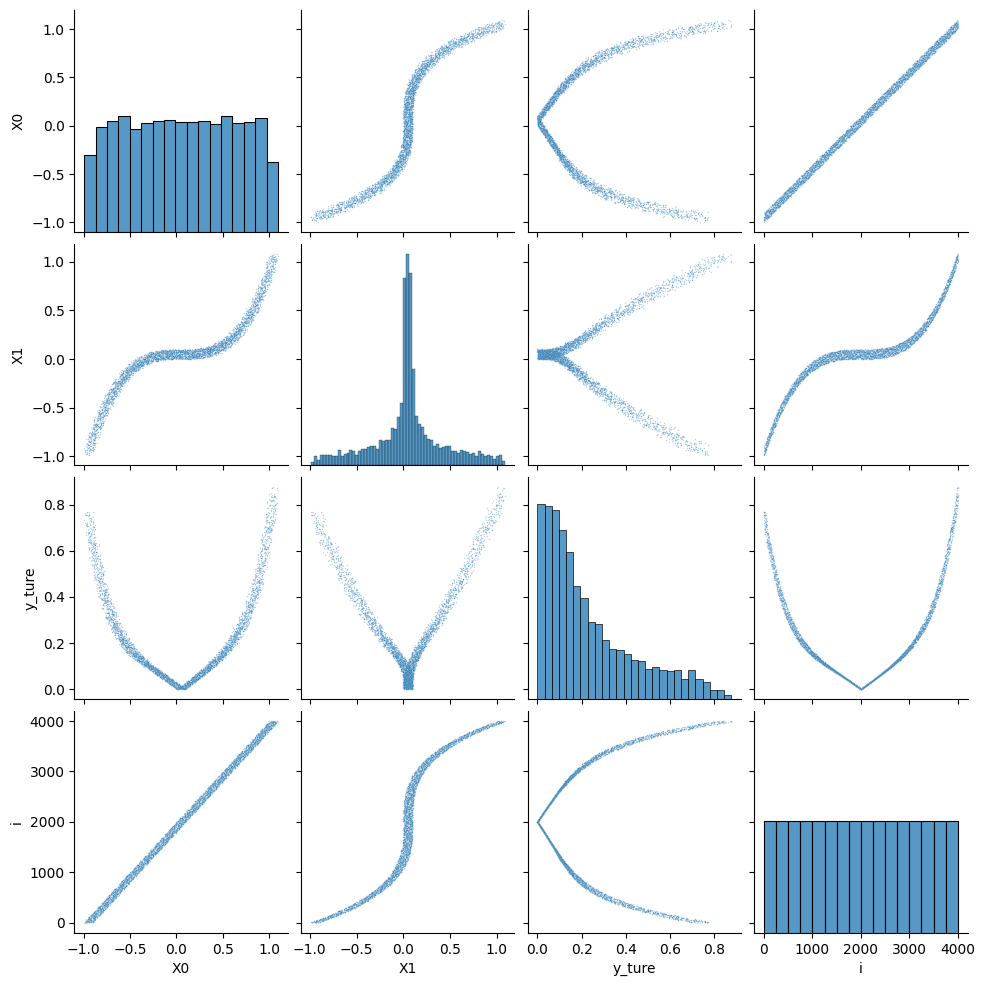

In [53]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [54]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=1000, batch_size=400, learning_rate=0.1)

Epoch 1/1000 [=........................], 0/3200: 
batch: 71.362, acc: 70.503, val: 68.918
Epoch 1/1000 [=........................], 400/3200: 
batch: 32.066, acc: 33.124, val: 32.422
Epoch 1/1000 [=........................], 800/3200: 
batch: 13.160, acc: 13.827, val: 13.555
Epoch 1/1000 [=........................], 1200/3200: 
batch: 7.461, acc: 7.390, val: 7.311
Epoch 1/1000 [=........................], 1600/3200: 
batch: 3.608, acc: 3.570, val: 3.535
Epoch 1/1000 [=........................], 2000/3200: 
batch: 4.745, acc: 4.278, val: 4.159
Epoch 1/1000 [=........................], 2400/3200: 
batch: 1.682, acc: 1.800, val: 1.764
Epoch 1/1000 [=........................], 2800/3200: 
batch: 11.801, acc: 11.881, val: 11.964
Epoch 2/1000 [=........................], 0/3200: 
batch: 8.564, acc: 8.522, val: 8.457
Epoch 2/1000 [=........................], 400/3200: 
batch: 2.445, acc: 2.469, val: 2.464
Epoch 2/1000 [=........................], 800/3200: 
batch: 2.735, acc: 2.621, val: 2.6

KeyboardInterrupt: 

#### Evaluate Model

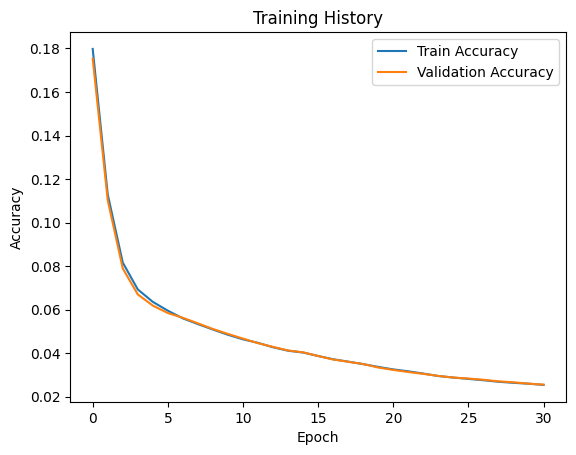

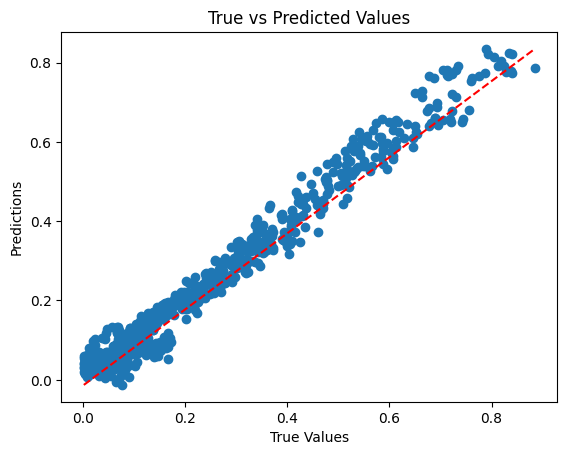

In [ ]:
history = model.getHistory()
history.evaluate()

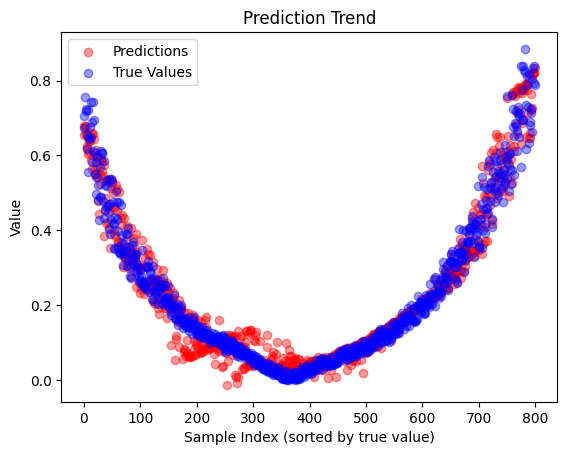

In [ ]:
history.display_trend(ref="x", axis=0)

### Newton's GD

#### Setup LR models class

In [ ]:
model = my_models.OptimizeNewtonLrModel()

test


In [ ]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

In [ ]:
model.total_params()

2161

#### Load dataset

In [ ]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,3)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = dataUtils.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


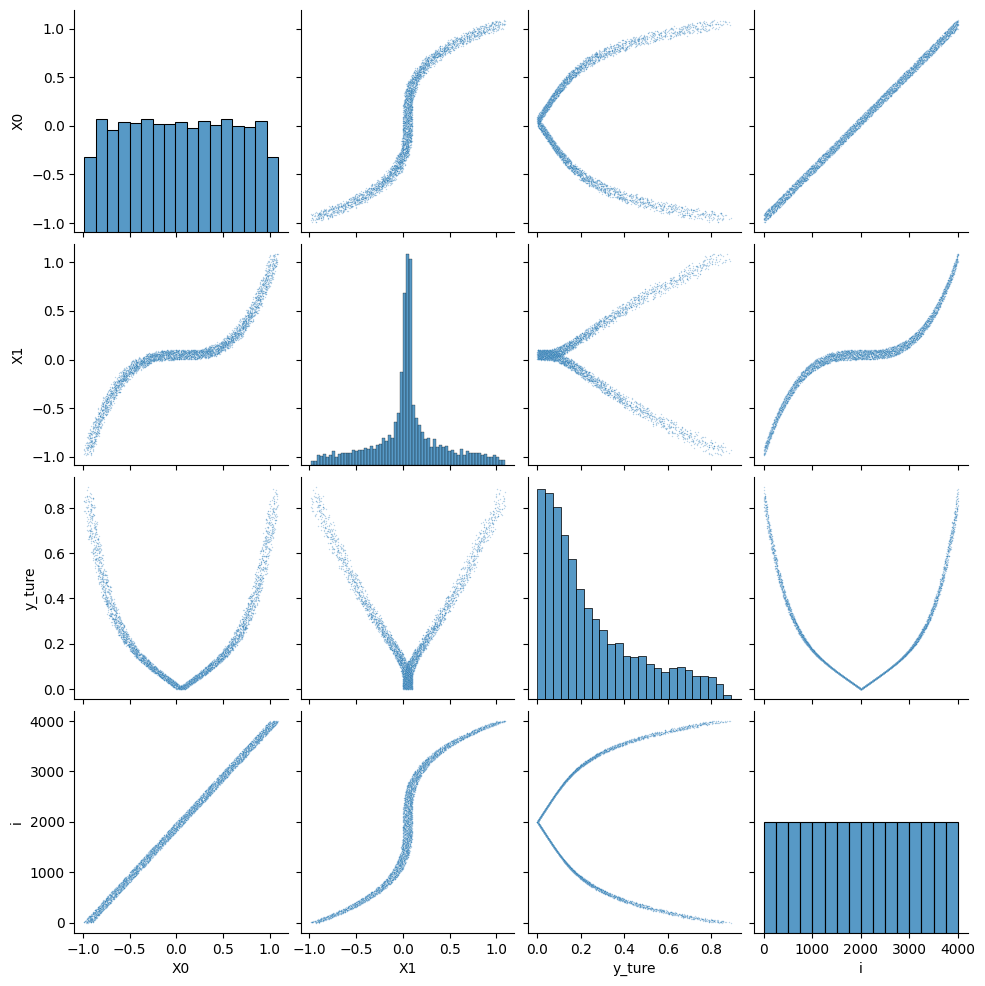

In [ ]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

#### Train Model

In [ ]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=5, batch_size=256)

Batch 0/3200: acc: 0.34674710426793337, val: 0.350965336600255
Batch 256/3200: acc: 0.3420156661524594, val: 0.3462228810770948
Batch 512/3200: acc: 0.3242147864511598, val: 0.3251650071572901
Batch 768/3200: acc: 0.31174899912597526, val: 0.3123058519284239
Batch 1024/3200: acc: 0.2722763036126251, val: 0.2741669817834122
Batch 1280/3200: acc: 0.2403902890967211, val: 0.24133030851753554
Batch 1536/3200: acc: 0.24219573001312317, val: 0.24188558001618568
Batch 1792/3200: acc: 0.20169094139228463, val: 0.19937643055345292
Batch 2048/3200: acc: 0.19663316854594295, val: 0.19481562835151273
Batch 2304/3200: acc: 0.18695065742113967, val: 0.18543752406255845
Batch 2560/3200: acc: 0.17388949914223445, val: 0.17094829351705287
Batch 2816/3200: acc: 0.1727485321102521, val: 0.16965455909473956
Batch 3072/3200: acc: 0.1477197921403752, val: 0.1440008567037872
Epoch 1/5 [=........................]
loss: 0.1477, val_loss: 0.1440

Batch 0/3200: acc: 0.12069036886624109, val: 0.11994753294967986


#### Evaluate Model

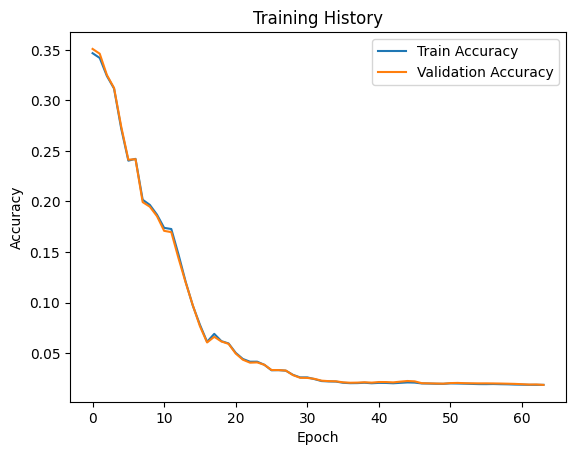

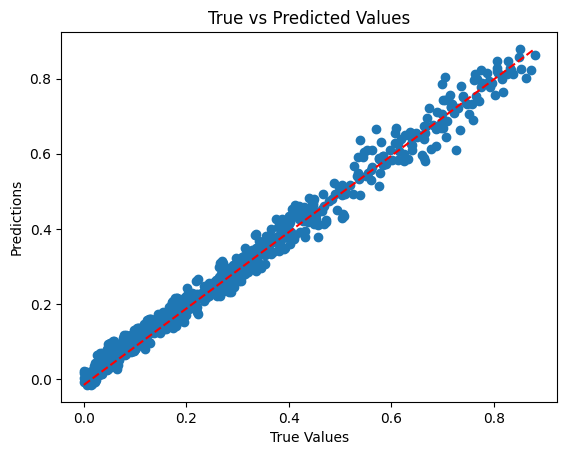

In [ ]:
history.evaluate()

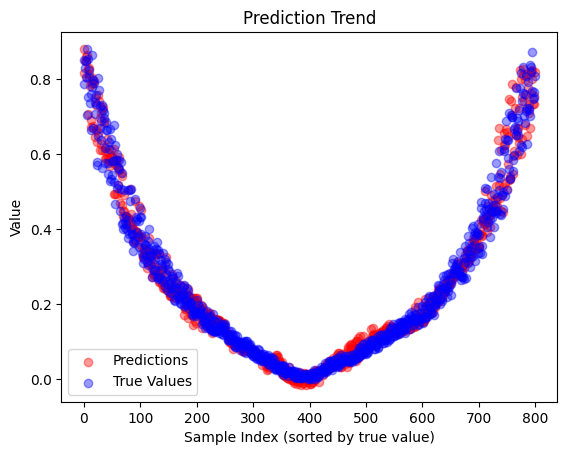

In [ ]:
history.display_trend(ref="x", axis=0)